In [1]:
import os
import pandas as pd
from scipy.signal import savgol_filter
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import pandas as pd
from scipy.signal import savgol_filter
import numpy as np
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

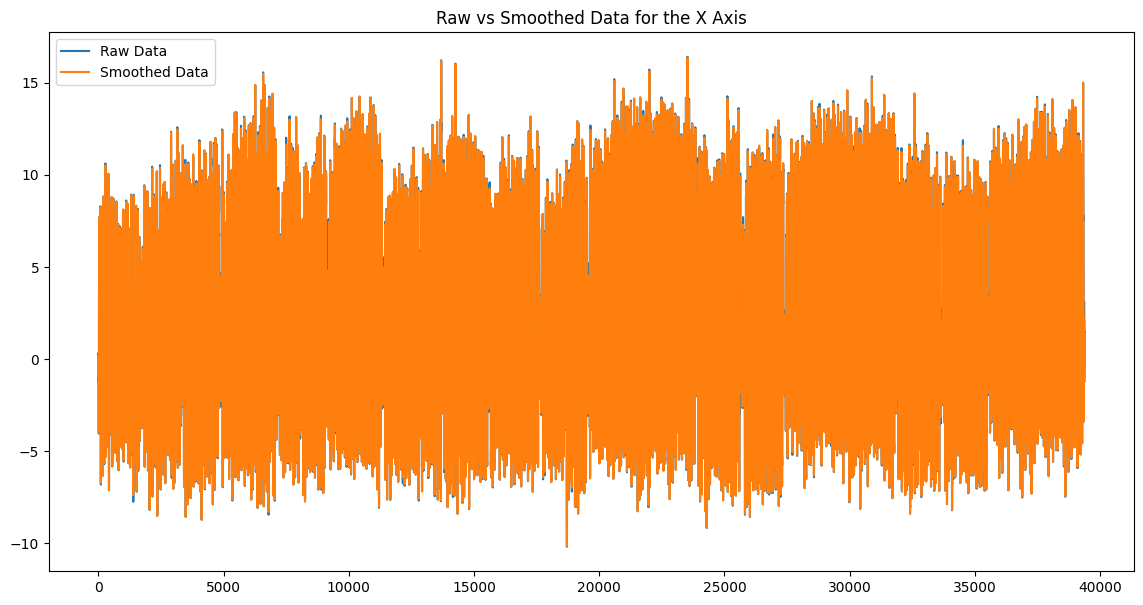

In [3]:
def read_and_label_files(directory, activity_prefix):
    raw_data_list = []
    smoothed_data_list = []
    for filename in os.listdir(directory):
        if filename.startswith(activity_prefix) and filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            data_raw = pd.read_csv(file_path)
            data_smoothed = smooth_data(data_raw.copy())  # Applying smoothing filter
            data_raw['activity'] = activity_prefix  # Label for raw data
            data_smoothed['activity'] = activity_prefix  # Label for smoothed data
            raw_data_list.append(data_raw)
            smoothed_data_list.append(data_smoothed)
    return pd.concat(raw_data_list, ignore_index=True), pd.concat(smoothed_data_list, ignore_index=True)
def smooth_data(data):
    for column in ['x', 'y', 'z']:
        data[column] = savgol_filter(data[column], window_length=5, polyorder=2)
    return data

def segment_into_windows(data, points_per_window):
    windows = []
    for start in range(0, len(data), points_per_window):
        end = start + points_per_window
        # Discarding the last window if it has fewer points than `points_per_window`
        if end <= len(data):
            window = data.iloc[start:end]
            windows.append(window)
    return windows
# Reading raw and smoothed data for each activity
walking_raw, walking_smoothed = read_and_label_files('/Users/Pradeep/Desktop/aalll CS655/MLHAR/my_files/Walking', 'walking')

# ... repeat for other activities like rotating, standing, liftUp, etc.
def plot_raw_vs_smoothed(data_raw, data_smoothed, axis_name):
    plt.figure(figsize=(14, 7))
    plt.plot(data_raw[axis_name], label='Raw Data')
    plt.plot(data_smoothed[axis_name], label='Smoothed Data')
    plt.title(f'Raw vs Smoothed Data for the {axis_name.upper()} Axis')
    plt.legend()
    plt.show()
# Now you have raw and smoothed data for each activity
# You can plot them using your plot_raw_vs_smoothed function
plot_raw_vs_smoothed(walking_raw, walking_smoothed, 'x')

# ... and so on for other activities
